In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import Counter, defaultdict
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [2]:
# Function to read .csv database and convert to variables.

def read_csv():
    x = []
    y = []
    z = []
    players = []
    x_label = "Average Placement"
    y_label = "Tournaments Played"
    z_label = "Tournaments Topped"
    with open('3dplayerDBTops.csv', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        header = 0
        for row in reader:
            if header == 0:
                header +=1
            else:
                x.append(float(row[1]) / float(row[2]))
                y.append(float(row[2]))
                z.append(float(row[3]))
                players.append(row[0])
    return x, y, z, x_label, y_label, z_label, players

In [3]:
# Assign values to variables

x, y, z, x_label, y_label, z_label, players = read_csv()

In [4]:
# Convert our (x,y,z) to a triplet array structure

X = np.vstack((x, y, z)).T

In [5]:
# Print header of our array

X

array([[17.        ,  3.        ,  1.        ],
       [27.08333333, 12.        ,  1.        ],
       [ 3.        ,  1.        ,  1.        ],
       ...,
       [49.        ,  2.        ,  0.        ],
       [49.        ,  2.        ,  0.        ],
       [49.        ,  2.        ,  0.        ]])

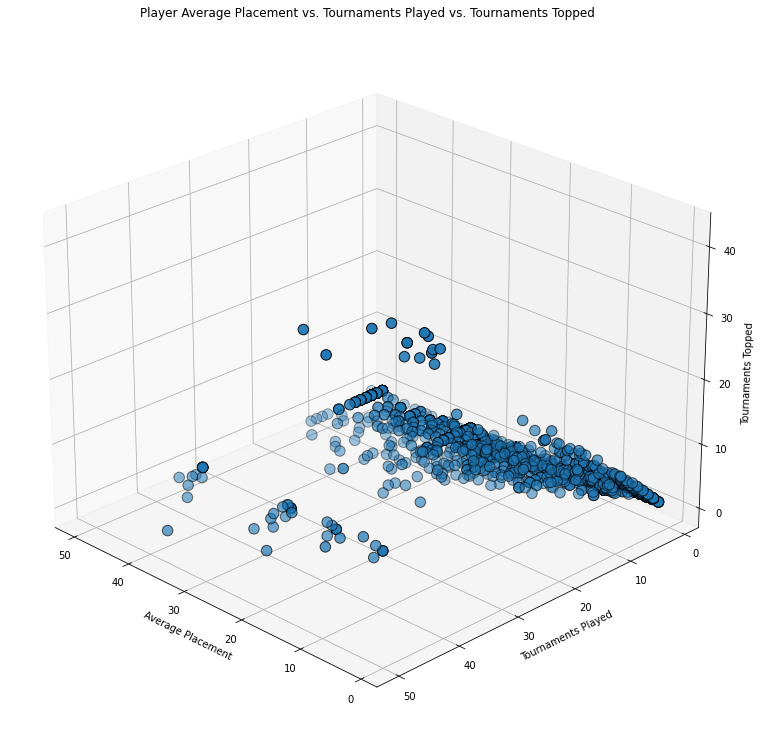

In [6]:
# Draw unclustered graph

# Configure plot
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, rect=[1, 1, 1, 1], elev=25, azim=135, auto_add_to_figure=False)
fig.add_axes(ax)

# Add information to plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolor="k", s=110)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)
ax.set_title("Player Average Placement vs. Tournaments Played vs. Tournaments Topped")
ax.dist = 10

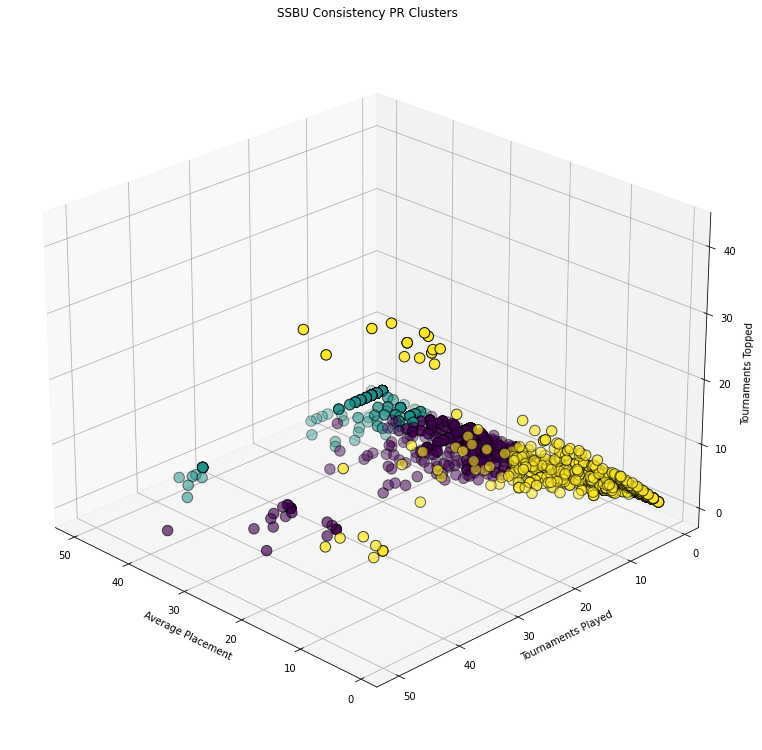

In [7]:
# Define amount of clusters (tiers)
est = KMeans(n_clusters=3)

# Configure plot
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, rect=[1, 1, 1, 1], elev=25, azim=135, auto_add_to_figure=False)
fig.add_axes(ax)

# Run K-Means Clustering
est.fit(X)
labels = est.labels_

# Add information to plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(float), edgecolor="k", s=110)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)
ax.set_title("SSBU Consistency PR Clusters")
ax.dist = 10

In [8]:
# Prepare each tier

tiers = {}
n = 0
for item in labels:
    if item in tiers:
        tiers[item].append(players[n])
    else:
        tiers[item] = [players[n]]
    n +=1

In [14]:
# Print out specific tier

tier = 0
n = 0

print("Tier ", tier)
for i in tiers[tier]:
    print(i, X[n])
    n+=1

Tier  0
Palazuelos [17.  3.  1.]
Summers [27.08333333 12.          1.        ]
OsoPalita3 [3. 1. 1.]
Grima [26.6875 16.      3.    ]
Gamer Freak Edy [5. 1. 1.]
Panda [5. 1. 1.]
JeWolf [7. 1. 1.]
Kirbyfan [36.66666667  6.          1.        ]
Soggyhondo [9. 4. 3.]
Pacsoad [9. 1. 0.]
Flamenco [9. 1. 0.]
Estefanía [13.4  5.   2. ]
Doc Cc [13.  1.  0.]
Robburitto [41.8  5.   0. ]
Hadez [13.  1.  0.]
Skebas [26.33333333  3.          0.        ]
Rw44 [17.  1.  0.]
0PR3S0R [17.  1.  0.]
Shoba [44.42857143  7.          0.        ]
Hedgy [17.  1.  0.]
Jumpboy [17.  1.  0.]
guaxxxo [17.  1.  0.]
D.danger [27.66666667  3.          0.        ]
ElFoco [17.  1.  0.]
DonPapaDon [16.  2.  1.]
Arises [25.  1.  0.]
Mafu [25.  1.  0.]
Winter [36.73333333 15.          0.        ]
PeachesOHKO [25.  1.  0.]
Spection [25.  1.  0.]
IvyN [25.  1.  0.]
JADO [25.  1.  0.]
Kyronic [33.  1.  0.]
Oz! [33.  1.  0.]
RYAQN [33.  1.  0.]
Camel [33.  1.  0.]
Fraudit [33.  1.  0.]
Chia [33.  1.  0.]
BANG! [33.  1.  0.]
R

Dark Blue [35.  2.  0.]
Bravo! [35.  2.  0.]
Trout~ [42.  2.  0.]
Guapo [35.66666667  3.          0.        ]
JankTrees [46.  2.  0.]
Ethan Winters [47.  2.  0.]
SweatOnly [35.8  5.   0. ]
Woz [49.  2.  0.]
Element [49.  2.  0.]
IcyStardust [1. 2. 2.]
Shays [ 4.47058824 17.         17.        ]
martz [3. 2. 2.]
Hercules [4. 2. 2.]
Autophobic [5. 2. 2.]
AC3theGR8 [5. 2. 2.]
King Loogi [7. 2. 2.]
A1ex [7. 2. 2.]
TriNex [9. 2. 0.]
Tony Hawk's Underground 2 [9. 2. 0.]
WhoDat [9. 2. 0.]
RoseKorynn [9. 2. 0.]
Burnstapee [13.  2.  0.]
ChiefMegaBeef [13.  2.  0.]
JJ [13.  2.  0.]
Maskon [13.  2.  0.]
Kobron Jordan [17.  2.  0.]
DatMj [33.  4.  0.]
FathoM [17.  2.  0.]
Sawtoothcomet [17.  2.  0.]
BigFish [17.  2.  0.]
.winter [17.  2.  0.]
North [17.  2.  0.]
Polyrealization [25.  2.  0.]
Clique [25.  2.  0.]
Floral [15.  4.  2.]
Tiny [25.  2.  0.]
L [25.  2.  0.]
Deino [25.  2.  0.]
Combustion [25.  2.  0.]
Crystal PG [25.  2.  0.]
KONDE [33.  2.  0.]
Hobbit [33.  2.  0.]
Eagle [33.  2.  0.]
V